In [1]:
#1. Dar acceso a Drive

Mounted at /content/drive


In [19]:
#2. Importar la libreria Pandas ;)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#3. Cargar su Dataset desde la opción "Upload to session storage"

In [34]:
def limite_inferior(q1, q3):
    return q1 - 1.5*(q3 - q1)

def limite_superior(q1, q3):
    return q3 + 1.5*(q3 - q1)

In [2]:
#4. Solo si se importa un Excel (En XXXXXXXXXX pegue su path)
df=pd.read_excel("Delitos_Sexuales_2019.xlsx", sheet_name="Delitos_Sexuales_2019")

In [27]:
df['Edad'][(df['sex'] == 'FEMENINO') & (df['muni'] == 'BOGOTA')].quantile(0.8)

78.0

In [36]:
print(limite_inferior(df['Edad'][(df['sex'] == 'FEMENINO') & (df['muni'] == 'BOGOTA')].quantile(0.25), df['Edad'][(df['sex'] == 'FEMENINO') & (df['muni'] == 'BOGOTA')].quantile(0.75)))
print(limite_superior(df['Edad'][(df['sex'] == 'FEMENINO') & (df['muni'] == 'BOGOTA')].quantile(0.25), df['Edad'][(df['sex'] == 'FEMENINO') & (df['muni'] == 'BOGOTA')].quantile(0.75)))

-2.0
30.0


## Boxplot Edad mujeres país

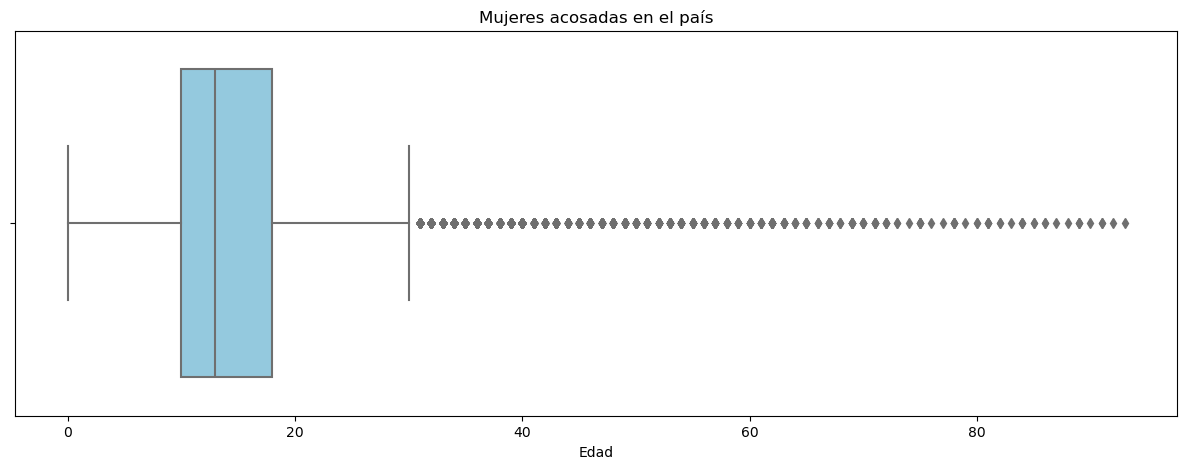

In [32]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=df['Edad'], color='skyblue')
plt.title('Mujeres acosadas en el país')
plt.xlabel('Edad')
plt.show()

## Boxplot Edad mujeres en Bogotá

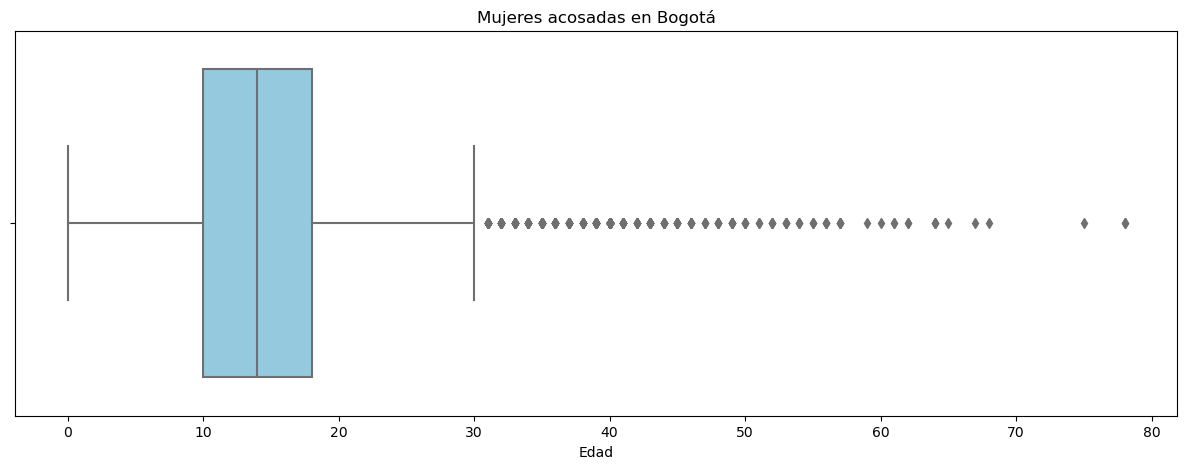

In [33]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=df['Edad'][(df['sex'] == 'FEMENINO') & (df['muni'] == 'BOGOTA')], color='skyblue')
plt.title('Mujeres acosadas en Bogotá')
plt.xlabel('Edad')
plt.show()

In [29]:
#5. Solo si se importa un csv (si el delimitador es tabulación usar /t ,si solo se quiere importar 2000 casos nrows=2000)
# df=pd.read_csv('XXXXXXXXXXXXX', delimiter=';', encoding = 'unicode_escape' )

93.0

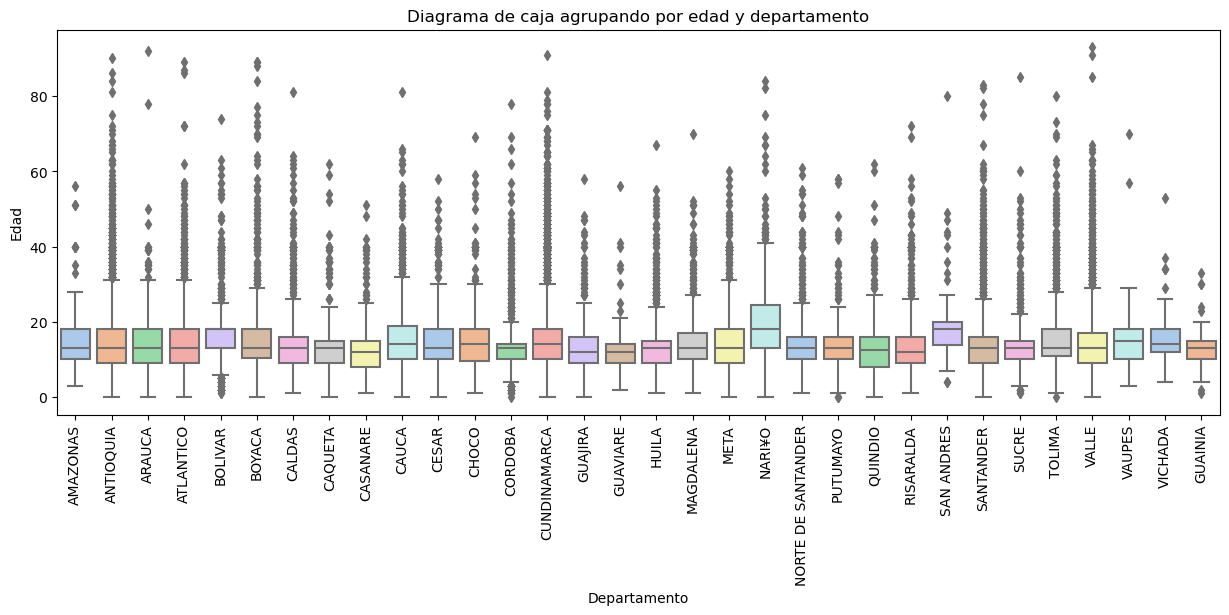

In [41]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=df['depto'], y=df['Edad'], palette='pastel')
plt.xticks(rotation=90)
plt.title('Diagrama de caja agrupando por edad y departamento')
plt.xlabel('Departamento')
plt.ylabel('Edad')
plt.show()

In [4]:
# Se van a hacer pruebas y tal
df.columns
df['sex'].value_counts(normalize=True).round(3)*100

FEMENINO     86.0
MASCULINO    14.0
Name: sex, dtype: float64

In [5]:
df['sex'] = df['sex'].replace({'FEMENINO':'Mujer', 'MASCULINO':'Hombre'})

In [6]:
df[['sex', 'Edad', 'Ecivil']]

,sex,Edad,Ecivil
0,Mujer,7.0,NaN
1,Mujer,21.0,UNION LIBRE
2,Mujer,16.0,SOLTERO
3,Mujer,4.0,SOLTERO
4,Mujer,8.0,SOLTERO
...,...,...,...
33785,Mujer,17.0,SOLTERO
33786,Mujer,36.0,SOLTERO
33787,Mujer,12.0,SOLTERO
33788,Mujer,13.0,SOLTERO


In [13]:
df[(df['Edad'] == 13)]['depto'].describe()

count             3829
unique              32
top       CUNDINAMARCA
freq               710
Name: depto, dtype: object

In [10]:
df.columns

Index(['date', 'depto', 'muni', 'delito', 'dia', 'hora', 'barrio', 'zona',
       'sitio', 'arma', 'agresor', 'victima', 'Edad', 'sex', 'Ecivil', 'pais',
       'ocupacion', 'profesion', 'educ', 'DANE'],
      dtype='object')

In [ ]:
#6. Limpieza: Reemplazar errores tipográficos
df['depto'] = df['depto'].replace({'NARI¥O': 'NARIÑO'})
df['muni'] = df['muni'].replace({'SALDA¥A': 'SALDAÑA'})

In [ ]:
#7. Limpieza: Recodificar variables
df['sex'] = df['sex'].replace({'FEMENINO': 'Mujer', 'MASCULINO': 'Hombre'})

In [ ]:
df['sex'].value_counts()

Mujer     29003
Hombre     4707
Name: sex, dtype: int64

In [ ]:
df['muni'][df['muni'].str.contains('BOG')].value_counts()

BOGOTA    5419
Name: muni, dtype: int64

In [ ]:
df[['depto','muni']].head()


,depto,muni
0,AMAZONAS,LETICIA
1,AMAZONAS,LETICIA
2,ANTIOQUIA,ABRIAQUI
3,ANTIOQUIA,AMAGA
4,ANTIOQUIA,AMAGA


In [ ]:
df['muni'][df['muni']=='BOGOTA']

124      BOGOTA
125      BOGOTA
126      BOGOTA
127      BOGOTA
128      BOGOTA
          ...  
33766    BOGOTA
33767    BOGOTA
33768    BOGOTA
33781    BOGOTA
33782    BOGOTA
Name: muni, Length: 5419, dtype: object

In [ ]:
import numpy as np
df['depto2']=np.where(df['muni']=='BOGOTA','BOGOTA',df['depto'])

In [ ]:
df['depto2'].value_counts(normalize=True)

BOGOTA                0.160373
ANTIOQUIA             0.133294
VALLE                 0.096715
CUNDINAMARCA          0.057739
ATLANTICO             0.055075
SANTANDER             0.047825
TOLIMA                0.040929
BOLIVAR               0.037082
HUILA                 0.032613
NARIÑO                0.027878
META                  0.027848
CALDAS                0.026694
CAUCA                 0.026665
RISARALDA             0.026369
BOYACA                0.025777
CORDOBA               0.024948
MAGDALENA             0.021722
CESAR                 0.020953
NORTE DE SANTANDER    0.020923
SUCRE                 0.013909
CAQUETA               0.010062
QUINDIO               0.009914
PUTUMAYO              0.009559
CASANARE              0.008760
ARAUCA                0.008346
GUAJIRA               0.007665
CHOCO                 0.006392
GUAVIARE              0.003788
AMAZONAS              0.003729
SAN ANDRES            0.002368
GUAINIA               0.001746
VICHADA               0.001361
VAUPES  

In [ ]:
df['depto2']=df['depto']


# **Ayuda** <br>
1. Tabular una variable cualitativa X:
`df['X’].value_counts(normalize=False)`

2. Seleccionar solo las variables X, Y:
df[['X', 'Y']]

3. Filtrar cuando la variable X es x:
df[df['X']=='x']

4. Filtrar cuando la variable X=x & Y=y
df[(df['X']=='x') & (df['Y']='y') ]

5. Filtrar por texto de variable:
df[df['X'].str.contains('xxx')]

6. Ordenar por la variable X:
df.sort_values(by=['X'],ascending=True)

7. Bloquear por una o más condiones:
df.loc[(df['X'] == 'x') & (df['Y'] == 'y')]

8. Redondear decimales:
round(X,1)

9. Reemplazar un símbolo para corregir typos
df['X']=df['X'].str.replace('¥','Ñ')

10. Recodificar valores de variables
df['X'] = df['X'].replace({'a': 'A', 'b': 'B'})

11. Group by
df.groupby(['X','Y'])['Z'].aggregate(['count','mean','std’])

12. Crosstabulation
pd.crosstab(df['X'], df['Y'],normalize=False)

13. Crear una tabla dinámica
df.pivot_table(index='X',columns='Y',values='Z',aggfunc='mean')


In [ ]:
import datetime
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y")
df['YYYY'] = pd.DatetimeIndex(df['date']).year
df['M'] = pd.DatetimeIndex(df['date']).month # de 1 a 12
df['D'] = pd.DatetimeIndex(df['date']).day # de 1 a 31
df['YYYYM'] = pd.to_datetime(df['date']).dt.to_period('M') # año y mes
df['dia2'] = pd.DatetimeIndex(df['date']).dayofweek # 0 a 6 donde 0 es lunes